In [2]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# %pip install kaggle
# %pip install kagglehub
import kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)
# !kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

/opt/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/imdesigns/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


In [4]:
def get_class_paths(path):
    classes = []
    class_paths = []

    for label in os.listdir(path):
        label_path = os.path.join(path, label)

        if os.path.isdir(label_path):
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)
                classes.append(label)
                class_paths.append(image_path)

    df = pd.DataFrame({"Class Path": class_paths, "Class": classes})

    return df

In [5]:
tr_df = get_class_paths("Training")

In [6]:
tr_df

,Class Path,Class
0,Training/pituitary/Tr-pi_0505.jpg,pituitary
1,Training/pituitary/Tr-pi_0263.jpg,pituitary
2,Training/pituitary/Tr-pi_0277.jpg,pituitary
3,Training/pituitary/Tr-pi_1169.jpg,pituitary
4,Training/pituitary/Tr-pi_0511.jpg,pituitary
...,...,...
5707,Training/meningioma/Tr-me_1053.jpg,meningioma
5708,Training/meningioma/Tr-me_0403.jpg,meningioma
5709,Training/meningioma/Tr-me_0365.jpg,meningioma
5710,Training/meningioma/Tr-me_0371.jpg,meningioma


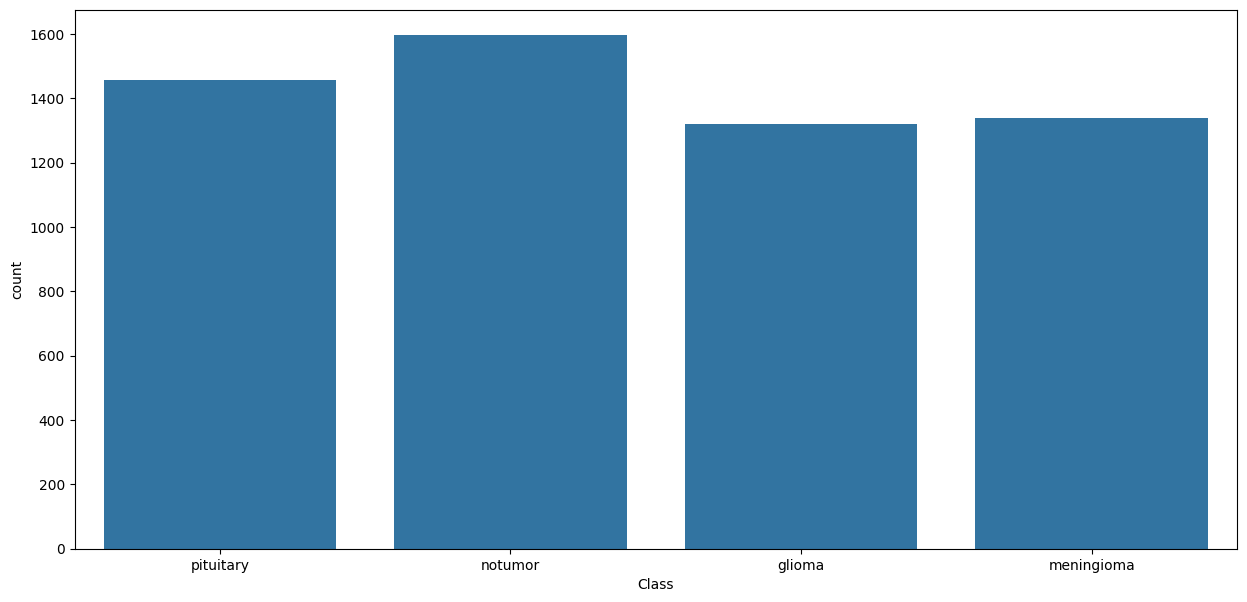

In [7]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x="Class")

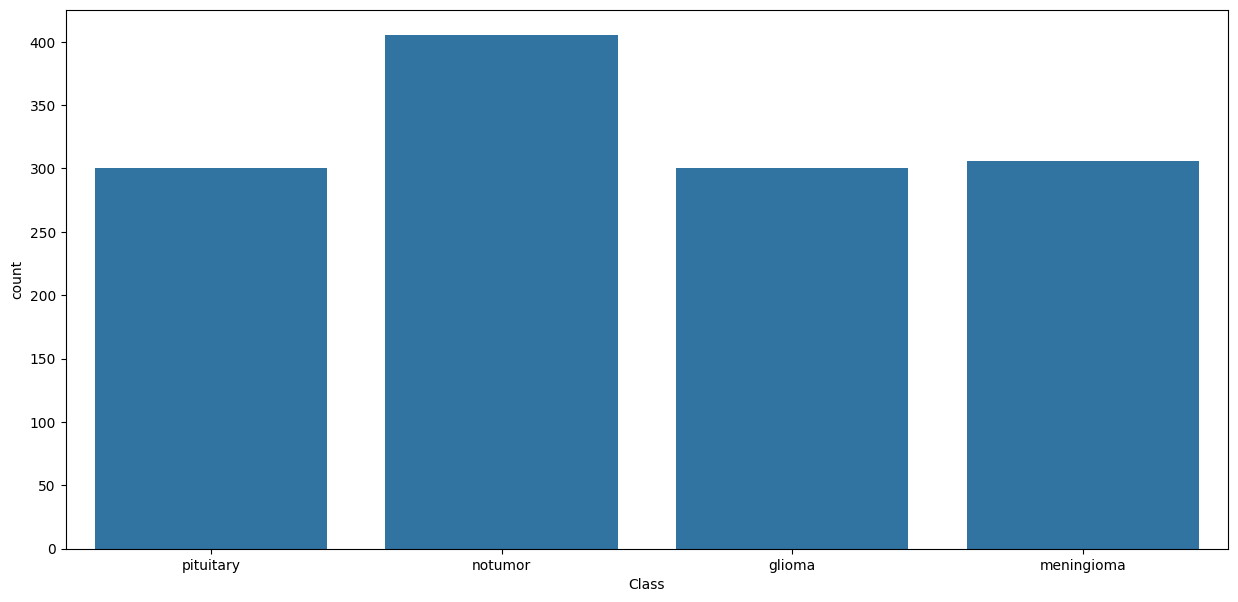

In [8]:
ts_df = get_class_paths("Testing")

plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, x="Class")

In [9]:
# !pip install tensorflow
# !pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
valid_df, test_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df["Class"])

In [11]:
valid_df

,Class Path,Class
707,Testing/glioma/Te-gl_0247.jpg,glioma
181,Testing/pituitary/Te-pi_0107.jpg,pituitary
73,Testing/pituitary/Te-pi_0237.jpg,pituitary
426,Testing/notumor/Te-no_0350.jpg,notumor
1279,Testing/meningioma/Te-me_0054.jpg,meningioma
...,...,...
320,Testing/notumor/Te-no_0326.jpg,notumor
397,Testing/notumor/Te-no_0295.jpg,notumor
907,Testing/glioma/Te-gl_0175.jpg,glioma
127,Testing/pituitary/Te-pi_0256.jpg,pituitary


In [12]:
ts_df

,Class Path,Class
0,Testing/pituitary/Te-pi_0233.jpg,pituitary
1,Testing/pituitary/Te-pi_0227.jpg,pituitary
2,Testing/pituitary/Te-pi_0019.jpg,pituitary
3,Testing/pituitary/Te-pi_0031.jpg,pituitary
4,Testing/pituitary/Te-pi_0025.jpg,pituitary
...,...,...
1306,Testing/meningioma/Te-me_0080.jpg,meningioma
1307,Testing/meningioma/Te-me_0094.jpg,meningioma
1308,Testing/meningioma/Te-me_0137.jpg,meningioma
1309,Testing/meningioma/Te-me_0123.jpg,meningioma


In [13]:
batch_size = 32

image_size = (299, 299)

image_generator = ImageDataGenerator(
    rescale=1.0 / 255,
    brightness_range=[0.8, 1.2],
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    vertical_flip=True,
)

ts_gen = ImageDataGenerator(rescale=1.0 / 255)

In [14]:
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col="Class Path",
    y_col="Class",
    target_size=image_size,
    batch_size=batch_size,
)

valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col="Class Path",
    y_col="Class",
    target_size=image_size,
    batch_size=batch_size,
)

ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col="Class Path",
    y_col="Class",
    target_size=image_size,
    batch_size=16,
    shuffle=False,
)

Found 5712 validated image filenames belonging to 4 classes.


Found 655 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


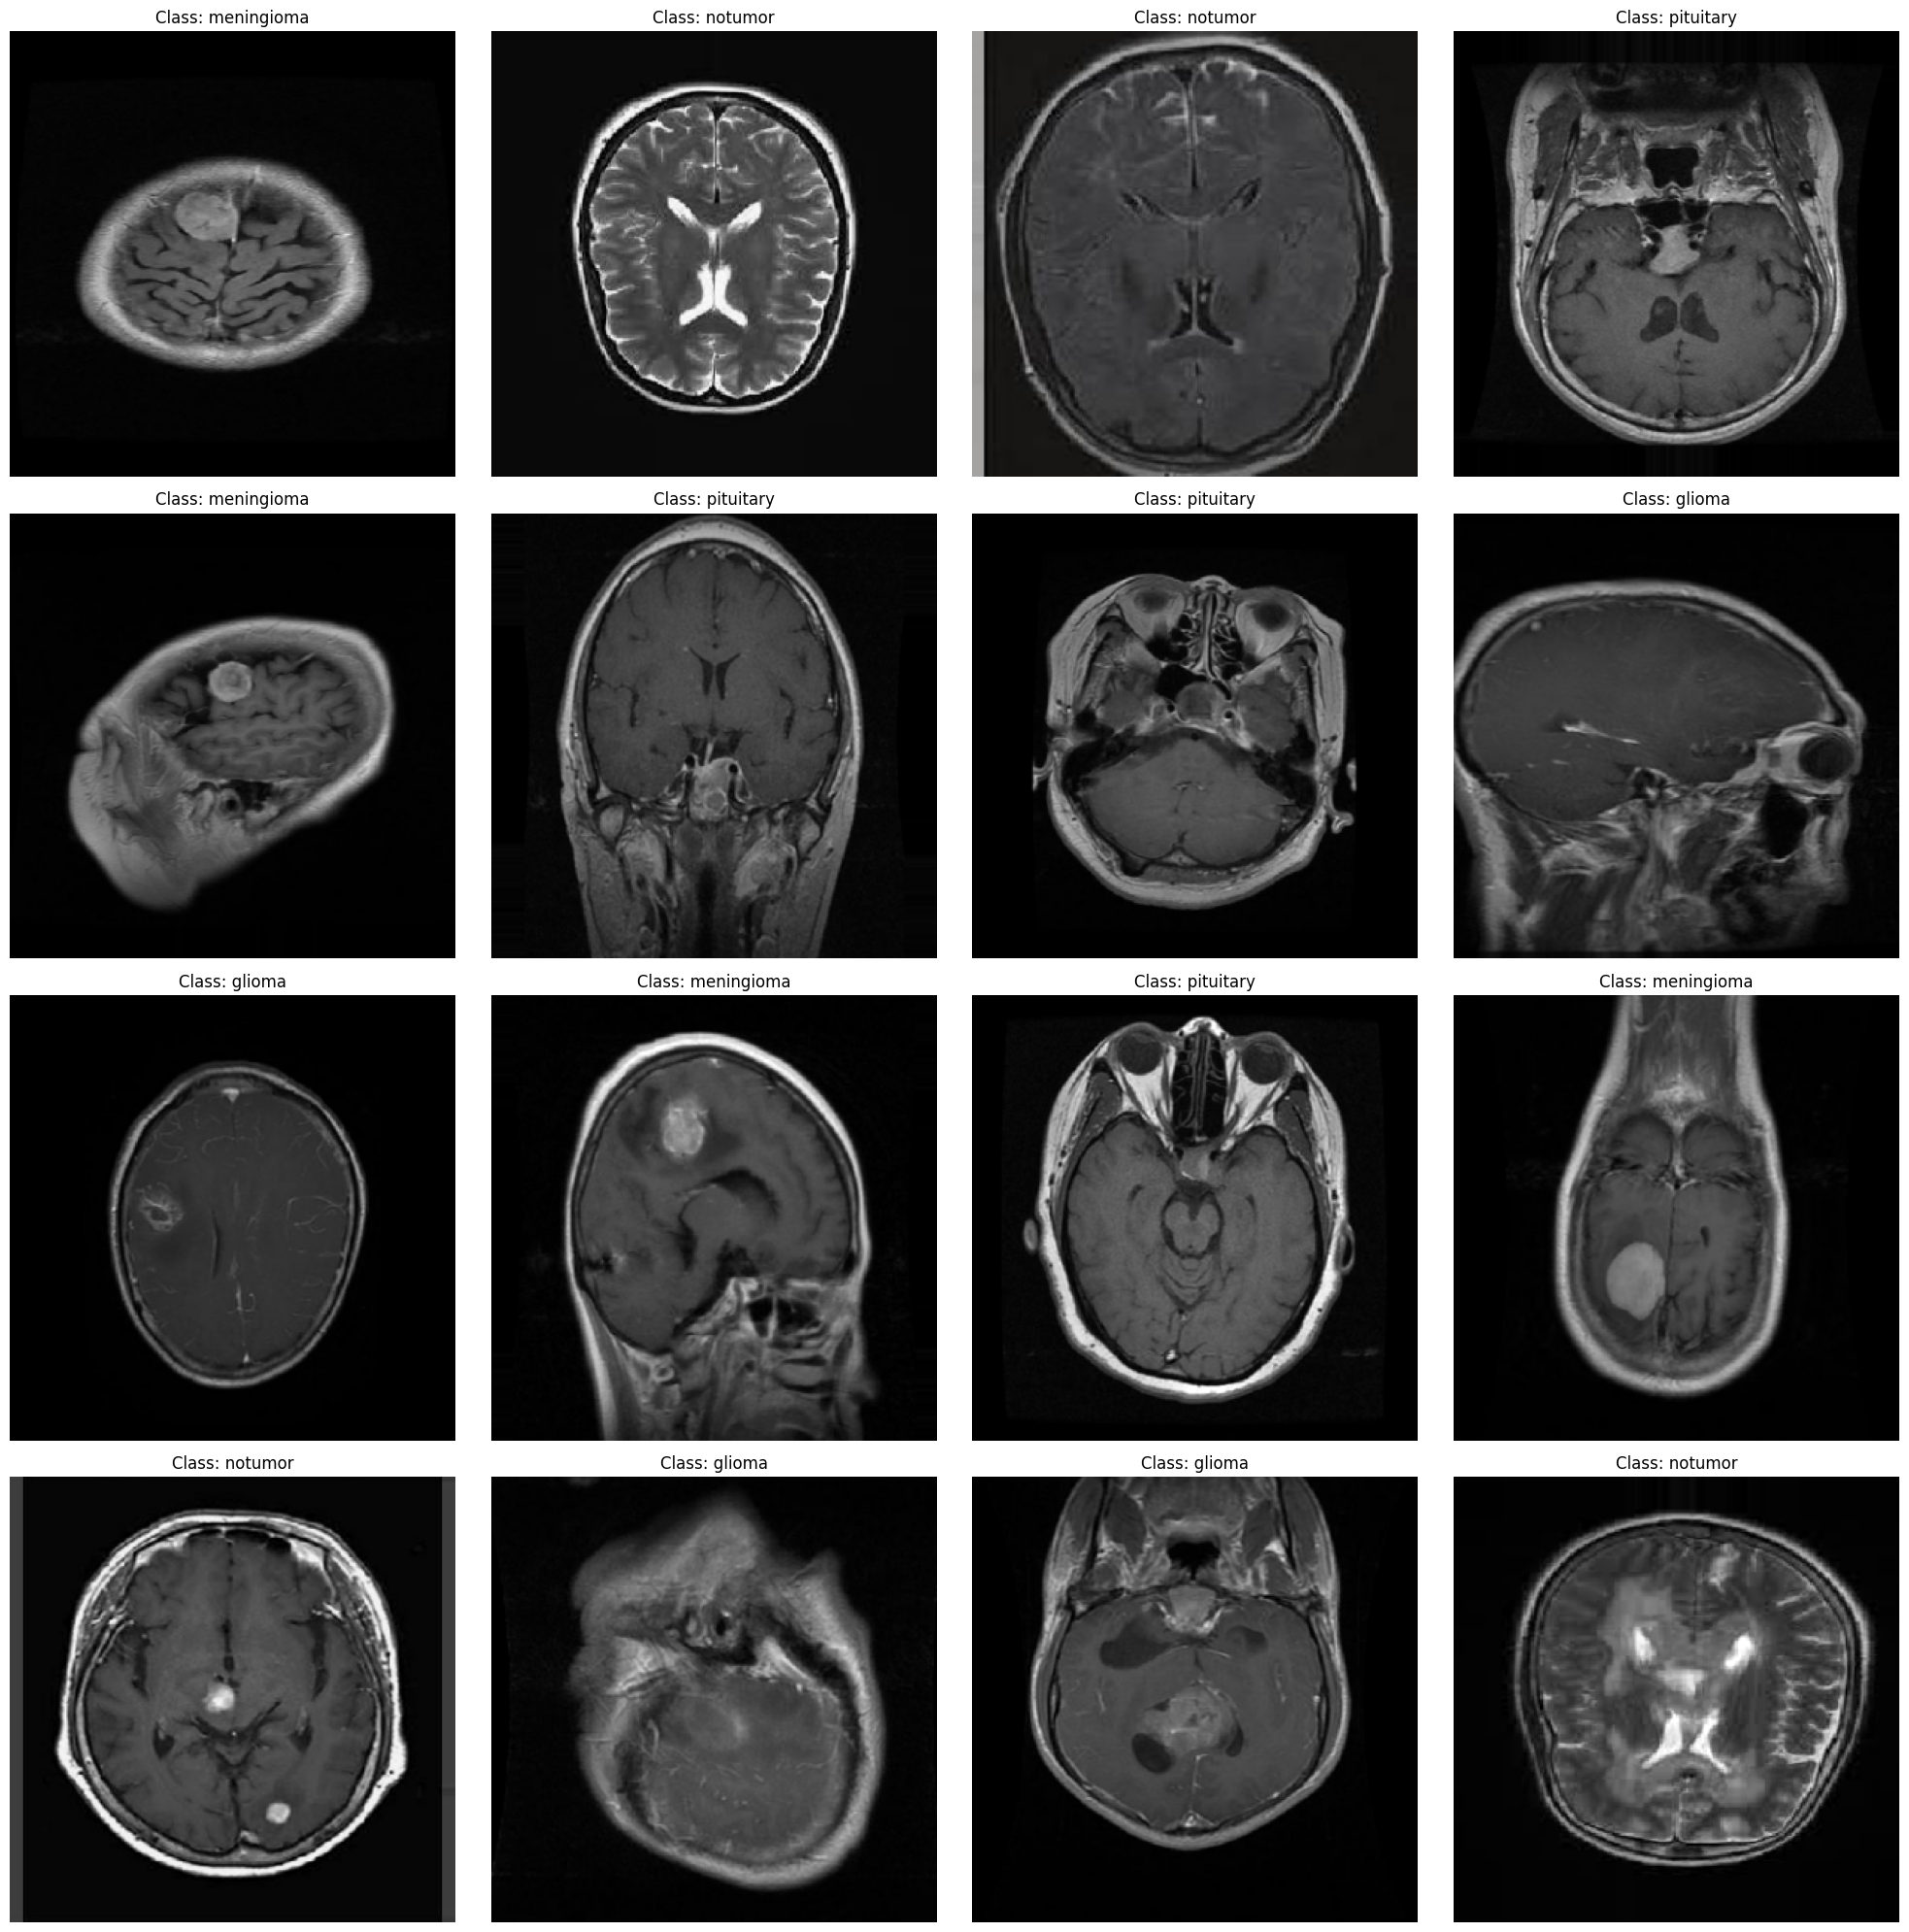

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

plt.figure(figsize=(20, 20))
try:
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        try:
            batch = next(tr_gen)
            image = batch[0][0]
            label = batch[1][0]

            # Handle potential normalization
            if image.max() <= 1.0:
                image = (image * 255).astype(np.uint8)

            plt.imshow(image)

            class_index = np.argmax(label)
            class_names = list(tr_gen.class_indices.keys())
            class_indices = list(tr_gen.class_indices.values())
            index_position = class_indices.index(class_index)
            class_name = class_names[index_position]

            plt.title(f"Class: {class_name}")
            plt.axis("off")
        except StopIteration:
            plt.title("End of dataset")
        except Exception as e:
            plt.title(f"Error: {str(e)}")

    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"An error occurred: {str(e)}")

In [16]:
image_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(
    include_top=False, input_shape=image_shape, weights="imagenet", pooling="max"
)

model = Sequential(
    [
        base_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense(128, activation="relu"),
        Dropout(rate=0.25),
        Dense(4, activation="softmax"),
    ]
)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step
